In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install seaborn matplotlib codecarbon torch transformers statsmodels wordcloud

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached matplotlib-3.9.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
  Using cached codecarbon-2.5.0-py3-none-any.whl (496 kB)
  Using cached torch-2.3.1-cp39-cp39-manylinux1_x86_64.whl (779.1 MB)
  Using cached transformers-4.41.2-py3-none-any.whl (9.1 MB)
  Using cached statsmodels-0.14.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 6.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 73.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 95.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 91.6 MB/s eta 0:00:00:00:01
  Using cached sympy-1.12.1-py3-none-any.whl (5.7 MB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch

%matplotlib inline

In [3]:
path="/Users/kyradresen/Downloads/fat clever beach repo anyscale/Z: icy uganda repo anyscale/mtsamples.csv"
df = pd.read_csv(path)
print(df.shape)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kyradresen/Downloads/fat clever beach repo anyscale/Z: icy uganda repo anyscale/mtsamples.csv'

In [ ]:
print(df.isnull().sum())
print(df.shape)

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64
(4999, 6)


In [246]:
df.isna().sum()

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64

In [247]:
# drop rows where transcription is na

df = df.dropna(subset=['transcription'])
df.isnull().sum()

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription           0
keywords             1068
dtype: int64

In [248]:
df.shape

(4966, 6)

In [249]:
# Select only the specified columns
df = df[['medical_specialty', 'transcription']]

In [250]:
# number of specialties
len(df.medical_specialty.unique())

40

In [251]:
df.isnull().sum()

medical_specialty    0
transcription        0
dtype: int64

### Filtering Dataset with Domain Expertise

 The surgey category is kind of superset as there can be surgeries belonging to specializations like cardiology,neurolrogy etc. Similarly other categories like Emergency Room Reports, Discharge Summary, Notes also overlap with specialities. These categories are either merged or removed



In [252]:
import pandas as pd

def filter_specialties(data, exclude_specialties):
    # Strip whitespace from 'medical_specialty' column
    data['medical_specialty'] = data['medical_specialty'].str.strip()

    # Filter out rows with specified medical specialties
    data = data[~data['medical_specialty'].isin(exclude_specialties)]

    # Consolidate specific specialties
    data.loc[data['medical_specialty'] == 'Neurosurgery', 'medical_specialty'] = 'Neurology'
    data.loc[data['medical_specialty'] == 'Nephrology', 'medical_specialty'] = 'Urology'

    # Filter out categories with fewer than 50 entries
    #data = data.groupby('medical_specialty').filter(lambda x: x.shape[0] > 50)

    # Group by 'medical_specialty' to check the categories and their counts
    final_data_categories = data.groupby('medical_specialty')

    # Display reduced categories
    print('============Reduced Categories======================')
    for i, (catName, dataCategory) in enumerate(final_data_categories, 1):
        print(f'Cat:{i} {catName} : {len(dataCategory)}')
    print('============Reduced Categories======================')

    # Drop rows with NaN in 'transcription'
    data = data.dropna(subset=['transcription'])

    return data

In [253]:
# List of specialties to be excluded
exclude_specialties = [
    'Surgery', 'SOAP / Chart / Progress Notes', 'Office Notes',
    'Consult - History and Phy.', 'Emergency Room Reports',
    'Discharge Summary', 'Pain Management', 'General Medicine'
]

# Example usage
# Assuming 'filtered_data_categories' is your DataFrame
# filtered_data_categories = pd.read_csv('your_data.csv') # Replace with your data loading method
data = filter_specialties(df, exclude_specialties)
print(data.shape)

============Reduced Categories======================
Cat:1 Allergy / Immunology : 7
Cat:2 Autopsy : 8
Cat:3 Bariatrics : 18
Cat:4 Cardiovascular / Pulmonary : 371
Cat:5 Chiropractic : 14
Cat:6 Cosmetic / Plastic Surgery : 27
Cat:7 Dentistry : 27
Cat:8 Dermatology : 29
Cat:9 Diets and Nutritions : 10
Cat:10 ENT - Otolaryngology : 96
Cat:11 Endocrinology : 19
Cat:12 Gastroenterology : 224
Cat:13 Hematology - Oncology : 90
Cat:14 Hospice - Palliative Care : 6
Cat:15 IME-QME-Work Comp etc. : 16
Cat:16 Lab Medicine - Pathology : 8
Cat:17 Letters : 23
Cat:18 Neurology : 317
Cat:19 Obstetrics / Gynecology : 155
Cat:20 Ophthalmology : 83
Cat:21 Orthopedic : 355
Cat:22 Pediatrics - Neonatal : 70
Cat:23 Physical Medicine - Rehab : 21
Cat:24 Podiatry : 47
Cat:25 Psychiatry / Psychology : 53
Cat:26 Radiology : 273
Cat:27 Rheumatology : 10
Cat:28 Sleep Medicine : 20
Cat:29 Speech - Language : 9
Cat:30 Urology : 237
============Reduced Categories======================
(2643, 2)


## Retrieve First Sentence of Transcription due to Computational Constraints

In [271]:
import pandas as pd
import re

def extract_age_related_sentences(df):
    """
    Extracts sentences containing the pattern '-year-old', 'y/o', 'patient', 'gentleman', 'he', 'she', 'female', 'parents', 'baby', or 'child'
    and the following two sentences from medical report transcriptions, adds these to a new column,
    and leaves the cell empty if no match is found. If the following two sentences are less than 45 words combined, 
    it will take up to 45 words from those sentences.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the full text of medical reports.

    Returns:
    pandas.DataFrame: Updated DataFrame with a new column 'age_related_sentence'.
    """
    # Compile the regular expression pattern for finding "-year-old", "y/o", "patient", "gentleman", "he", "she", "male", "female", "parents", "baby", "child" and the following two sentences
    pattern = re.compile(r'\b([^\.!?]*?\b(?:old|y/o|patient|gentleman|he|she|male|female|parents|baby|child|infant)\b[^\.!?]*[\.!?])\s*([^\.!?]*[\.!?])\s*([^\.!?]*[\.!?])', re.IGNORECASE)

    # List to store the age-related sentences with the following two sentences
    age_sentences = []

    # Iterate through each transcription in the DataFrame
    for text in df['transcription']:
        # Find all matches in the text
        matches = pattern.findall(text)
        if matches:
            # Take the first match
            first_match = ' '.join(matches[0]).strip()
            words = first_match.split()
            if len(words) < 45:
                # If combined sentences are less than 45 words, add more words from the text
                all_words = text.split()
                match_start_index = text.lower().find(first_match.lower())
                additional_words = all_words[(match_start_index + len(words)):]

                if len(words) + len(additional_words) > 45:
                    words += additional_words[:45 - len(words)]
                else:
                    words += additional_words

                first_match = ' '.join(words)
            age_sentences.append(first_match)
        else:
            # If no matches, append an empty string
            age_sentences.append('')

    # Add the extracted sentences as a new column in the DataFrame
    df['age_related_sentence'] = age_sentences

    return df

# Apply the function to the DataFrame
# Apply the function to the DataFrame
df=data
df = extract_age_related_sentences(df)
print(df[['transcription', 'age_related_sentence']])


                                          transcription  \
0     SUBJECTIVE:,  This 23-year-old white female pr...   
1     PAST MEDICAL HISTORY:, He has difficulty climb...   
2     HISTORY OF PRESENT ILLNESS: , I have seen ABC ...   
3     2-D M-MODE: , ,1.  Left atrial enlargement wit...   
4     1.  The left ventricular cavity size and wall ...   
...                                                 ...   
4994  HISTORY:,  I had the pleasure of meeting and e...   
4995  ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...   
4996  SUBJECTIVE: , This is a 42-year-old white fema...   
4997  CHIEF COMPLAINT: , This 5-year-old male presen...   
4998  HISTORY: , A 34-year-old male presents today s...   

                                   age_related_sentence  
0     SUBJECTIVE:, This 23-year-old white female pre...  
1     PAST MEDICAL HISTORY:, He has difficulty climb...  
2     He is a very pleasant gentleman who is 42 year...  
3                                                        
4

In [272]:
df.shape

(2643, 3)

In [273]:
df

,medical_specialty,transcription,age_related_sentence
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr...","SUBJECTIVE:, This 23-year-old white female pre..."
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb...","PAST MEDICAL HISTORY:, He has difficulty climb..."
2,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...",He is a very pleasant gentleman who is 42 year...
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit...",
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...,
...,...,...,...
4994,Allergy / Immunology,"HISTORY:, I had the pleasure of meeting and e...","HISTORY:, I had the pleasure of meeting and e..."
4995,Allergy / Immunology,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","HOSPITAL COURSE:, This is a 14-month-old baby..."
4996,Allergy / Immunology,"SUBJECTIVE: , This is a 42-year-old white fema...","SUBJECTIVE: , This is a 42-year-old white fema..."
4997,Allergy / Immunology,"CHIEF COMPLAINT: , This 5-year-old male presen...","CHIEF COMPLAINT: , This 5-year-old male presen..."


In [274]:
# This method accounts for both null values and empty strings
non_empty_count = df['age_related_sentence'].replace('', pd.NA).notna().sum()
print("Number of non-empty rows:", non_empty_count)


Number of non-empty rows: 2308


In [275]:
df['medical_specialty'].value_counts()

medical_specialty
Cardiovascular / Pulmonary    371
Orthopedic                    355
Neurology                     317
Radiology                     273
Urology                       237
Gastroenterology              224
Obstetrics / Gynecology       155
ENT - Otolaryngology           96
Hematology - Oncology          90
Ophthalmology                  83
Pediatrics - Neonatal          70
Psychiatry / Psychology        53
Podiatry                       47
Dermatology                    29
Cosmetic / Plastic Surgery     27
Dentistry                      27
Letters                        23
Physical Medicine - Rehab      21
Sleep Medicine                 20
Endocrinology                  19
Bariatrics                     18
IME-QME-Work Comp etc.         16
Chiropractic                   14
Rheumatology                   10
Diets and Nutritions           10
Speech - Language               9
Autopsy                         8
Lab Medicine - Pathology        8
Allergy / Immunology          

In [276]:
df

,medical_specialty,transcription,age_related_sentence
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr...","SUBJECTIVE:, This 23-year-old white female pre..."
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb...","PAST MEDICAL HISTORY:, He has difficulty climb..."
2,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...",He is a very pleasant gentleman who is 42 year...
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit...",
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...,
...,...,...,...
4994,Allergy / Immunology,"HISTORY:, I had the pleasure of meeting and e...","HISTORY:, I had the pleasure of meeting and e..."
4995,Allergy / Immunology,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","HOSPITAL COURSE:, This is a 14-month-old baby..."
4996,Allergy / Immunology,"SUBJECTIVE: , This is a 42-year-old white fema...","SUBJECTIVE: , This is a 42-year-old white fema..."
4997,Allergy / Immunology,"CHIEF COMPLAINT: , This 5-year-old male presen...","CHIEF COMPLAINT: , This 5-year-old male presen..."


In [277]:
# Create a new DataFrame df2 that holds all rows where 'age_related_sentence' is empty
df2 = df[df['age_related_sentence'].replace('', pd.NA).isna()]

# Count empty rows in 'age_related_sentence' column
empty_count = df2.shape[0]
print("Number of empty rows:", empty_count)

Number of empty rows: 335


In [278]:
df2

,medical_specialty,transcription,age_related_sentence
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit...",
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...,
7,Cardiovascular / Pulmonary,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",
9,Cardiovascular / Pulmonary,"DESCRIPTION:,1. Normal cardiac chambers size....",
11,Cardiovascular / Pulmonary,"2-D STUDY,1. Mild aortic stenosis, widely calc...",
...,...,...,...
4966,Cardiovascular / Pulmonary,"INDICATIONS:, Peripheral vascular disease wit...",
4967,Cardiovascular / Pulmonary,"EXAM: , Left heart cath, selective coronary an...",
4971,Cardiovascular / Pulmonary,"ANGINA, is chest pain due to a lack of oxygen ...",
4983,Autopsy,"MANNER OF DEATH: , Homicide.,CAUSE OF DEATH:,",


In [279]:
# Drop all rows where 'age_related_sentence' is empty
df = df[df['age_related_sentence'].replace('', pd.NA).notna()]

In [280]:
# This accesses the first row and the column by its position; here we assume 'age_related_sentence' is the first column
df.iloc[5]['age_related_sentence']  # 0 is the index of the first row

'FINDINGS AND PROCEDURE:,  With the patient under satisfactory general endotracheal anesthesia, the entire abdomen, flanks, perineum, and thighs to the knees were prepped and draped circumferentially in sterile fashion. After this had been completed, a #15 blade was used to make small stab wounds in the lateral hips, the pubic area, and upper edge of the umbilicus. Through these small incisions, a cannula was used to infiltrate lactated Ringers with 1000 cc was infiltrated initially into the abdomen.'

In [287]:
import re
import pandas as pd

def extract_text_after_comma(df, column_name):
    """
    Extracts text following the first comma within the first 4 words of the specified column of a DataFrame
    and ensures there are at least two consecutive capital letters forming a word within the first 4 words.
    If the comma is not within the first 4 words, or there are not at least two consecutive capital letters forming a word within the first 4 words,
    the original text is kept.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to process.

    Returns:
    pandas.DataFrame: The DataFrame with an additional column 'extracted_text' containing the extracted text or the original text.
    """
    # List to store the extracted text
    extracted_text = []

    # Regular expression to find at least two consecutive capital letters forming a word
    capital_letter_pattern = re.compile(r'\b[A-Z]{2,}\b')

    # Iterate through each row in the specified column
    for text in df[column_name]:
        words = text.split()
        # Find the position of the first comma within the first 4 words
        if len(words) >= 4:
            first_four_words = ' '.join(words[:4])
            remaining_text = ' '.join(words[4:])
            if ',' in first_four_words and capital_letter_pattern.search(first_four_words):
                first_four_words = first_four_words.split(',', 1)[1].strip()
                extracted_text.append(f"{first_four_words} {remaining_text}".strip())
            else:
                extracted_text.append(text)
        else:
            if ',' in text and capital_letter_pattern.search(text):
                extracted_text.append(text.split(',', 1)[1].strip())
            else:
                extracted_text.append(text)

    # Add the extracted text as a new column in the DataFrame
    df['extracted_text'] = extracted_text
    return df

# Apply the function to the DataFrame
df = extract_text_after_comma(df, 'age_related_sentence')
print(df[['age_related_sentence', 'extracted_text']])


                                   age_related_sentence  \
0     SUBJECTIVE:, This 23-year-old white female pre...   
1     PAST MEDICAL HISTORY:, He has difficulty climb...   
2     He is a very pleasant gentleman who is 42 year...   
5     INDICATION FOR PROCEDURE: , This is a 30-year-...   
6     INDICATION FOR OPERATION:,  The patient is a 3...   
...                                                 ...   
4994  HISTORY:,  I had the pleasure of meeting and e...   
4995  HOSPITAL COURSE:,  This is a 14-month-old baby...   
4996  SUBJECTIVE: , This is a 42-year-old white fema...   
4997  CHIEF COMPLAINT: , This 5-year-old male presen...   
4998  HISTORY: , A 34-year-old male presents today s...   

                                         extracted_text  
0     This 23-year-old white female presents with co...  
1     He has difficulty climbing stairs, difficulty ...  
2     He is a very pleasant gentleman who is 42 year...  
5     This is a 30-year-old female, who has been ove...  
6

/var/folders/th/lhv5svr57tl9sd7p465ddg3h0000gn/T/ipykernel_6335/1882232965.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_text'] = extracted_text


/var/folders/th/lhv5svr57tl9sd7p465ddg3h0000gn/T/ipykernel_6335/955514208.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  word_lengths = df[columns_to_clean].applymap(calculate_word_length)


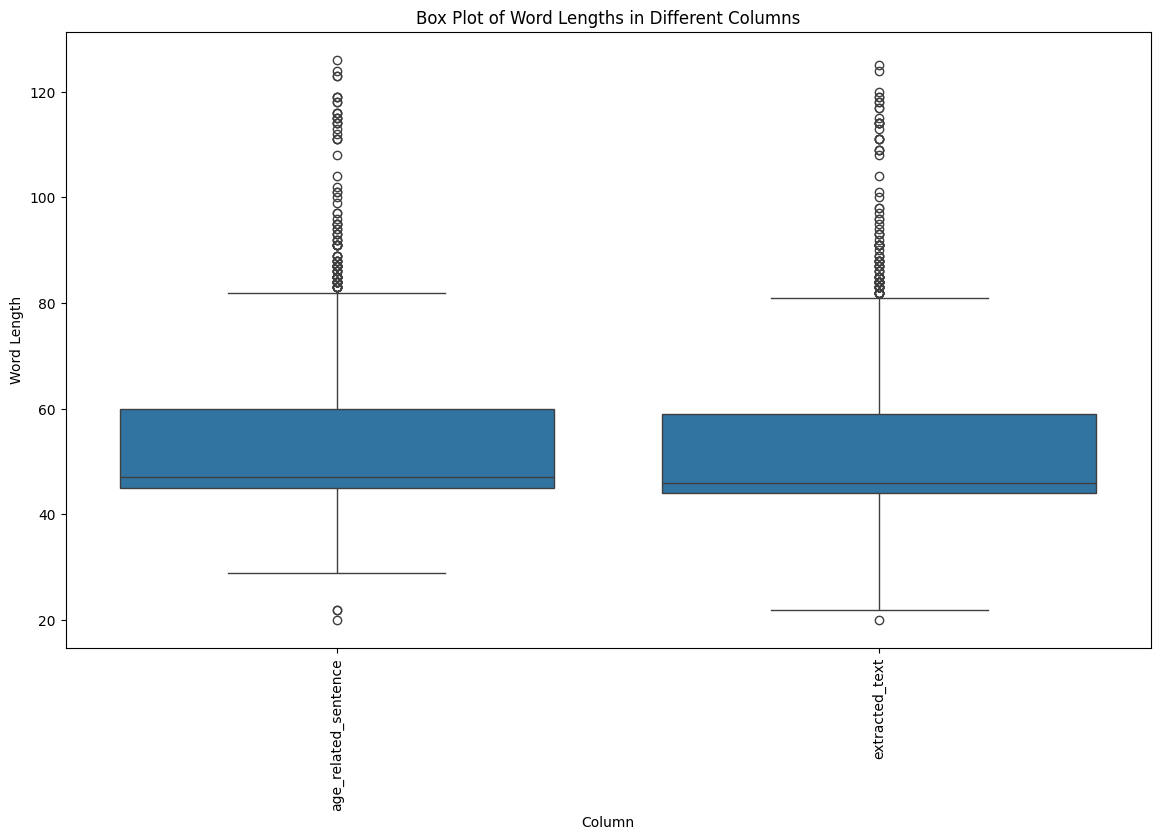

In [288]:
columns_to_clean = [
    'age_related_sentence',
    'extracted_text'
]


# Function to calculate word lengths
def calculate_word_length(text):
    return len(str(text).split())

# Apply the function to each column in columns_to_clean and create a new DataFrame
word_lengths = df[columns_to_clean].applymap(calculate_word_length)

# Melt the DataFrame for plotting
word_lengths_melted = word_lengths.melt(var_name='Column', value_name='Word Length')

# Create a box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Column', y='Word Length', data=word_lengths_melted)
plt.xticks(rotation=90)
plt.title('Box Plot of Word Lengths in Different Columns')
plt.xlabel('Column')
plt.ylabel('Word Length')
plt.show()


In [289]:
import pandas as pd

def print_short_transcriptions(df, column_name, max_length=20):
    """
    This function prints all rows from the specified column that have fewer than max_length words.

    :param df: pandas DataFrame
    :param column_name: name of the column containing the transcriptions
    :param max_length: maximum number of words to consider a transcription as 'short'
    """
    # Ensure the column exists in the DataFrame
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")

    # Calculate word count for each transcription
    df['word_count'] = df[column_name].apply(lambda x: len(str(x).split()))
    
    # Filter and print rows with word count less than max_length
    short_transcriptions = df[df['word_count'] < max_length]
    return(short_transcriptions)

# Example usage:
# df = pd.DataFrame({'transcriptions': ["This is a sample.", "Another example of a transcription that is slightly longer.", "Short one."]})
df_short = print_short_transcriptions(df, 'extracted_text')

/var/folders/th/lhv5svr57tl9sd7p465ddg3h0000gn/T/ipykernel_6335/1361950159.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df[column_name].apply(lambda x: len(str(x).split()))


In [290]:
df.shape

(2308, 5)

In [291]:
df

,medical_specialty,transcription,age_related_sentence,extracted_text,word_count
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr...","SUBJECTIVE:, This 23-year-old white female pre...",This 23-year-old white female presents with co...,44
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb...","PAST MEDICAL HISTORY:, He has difficulty climb...","He has difficulty climbing stairs, difficulty ...",43
2,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...",He is a very pleasant gentleman who is 42 year...,He is a very pleasant gentleman who is 42 year...,45
5,Bariatrics,"PREOPERATIVE DIAGNOSIS: , Morbid obesity.,POST...","INDICATION FOR PROCEDURE: , This is a 30-year-...","This is a 30-year-old female, who has been ove...",41
6,Bariatrics,"PREOPERATIVE DIAGNOSES:,1. Deformity, right b...","INDICATION FOR OPERATION:, The patient is a 3...",The patient is a 31-year-old white female who ...,59
...,...,...,...,...,...
4994,Allergy / Immunology,"HISTORY:, I had the pleasure of meeting and e...","HISTORY:, I had the pleasure of meeting and e...",I had the pleasure of meeting and evaluating t...,79
4995,Allergy / Immunology,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","HOSPITAL COURSE:, This is a 14-month-old baby...",This is a 14-month-old baby boy Caucasian who ...,73
4996,Allergy / Immunology,"SUBJECTIVE: , This is a 42-year-old white fema...","SUBJECTIVE: , This is a 42-year-old white fema...",This is a 42-year-old white female who comes i...,43
4997,Allergy / Immunology,"CHIEF COMPLAINT: , This 5-year-old male presen...","CHIEF COMPLAINT: , This 5-year-old male presen...",This 5-year-old male presents to Children's Ho...,42


In [292]:
df.sort_values(by='word_count', ascending=True)

,medical_specialty,transcription,age_related_sentence,extracted_text,word_count
4794,Cardiovascular / Pulmonary,"PROCEDURE:, Flexible bronchoscopy.,PREOPERATIV...",The patient was sedated with sevoflurane and p...,The patient was sedated with sevoflurane and p...,20
4841,Cardiovascular / Pulmonary,"COMPARISON:, None.,MEDICATIONS:, Lopressor 5mg...","FINDINGS:,CALCIUM SCORE: The patient's total A...",CALCIUM SCORE: The patient's total Agatston ca...,22
1723,Radiology,"COMPARISON:, None.,MEDICATIONS:, Lopressor 5mg...","FINDINGS:,CALCIUM SCORE: The patient's total A...",CALCIUM SCORE: The patient's total Agatston ca...,22
3777,ENT - Otolaryngology,"PREOPERATIVE DIAGNOSES,1. Recurrent acute oti...","DESCRIPTION OF OPERATIONS: , The patient was b...","The patient was brought to the operating room,...",26
4881,Cardiovascular / Pulmonary,"PREOPERATIVE DIAGNOSIS:,1. Severe chronic obst...","INDICATIONS FOR OPERATION: ,This 50-year-old g...",This 50-year-old gentleman with severe respira...,26
...,...,...,...,...,...
1785,Psychiatry / Psychology,"REASON FOR CONSULTATION: , Lethargy.,HISTORY O...","HISTORY OF PRESENT ILLNESS:, The patient is a...",The patient is a 62-year-old white female with...,119
4975,Cardiovascular / Pulmonary,"HISTORY OF PRESENT ILLNESS: , Mr. ABC is a 60-...",ABC is a 60-year-old gentleman who had a marke...,ABC is a 60-year-old gentleman who had a marke...,119
2725,Neurology,"INDICATION FOR OPERATION:, Right coronal syno...","DESCRIPTION OF PROCEDURE:, After satisfactory...",After satisfactory general endotracheal tube a...,120
1776,Psychiatry / Psychology,"HISTORY OF PRESENT ILLNESS: ,This is a 23-yea...","HISTORY OF PRESENT ILLNESS: ,This is a 23-yea...","HISTORY OF PRESENT ILLNESS: ,This is a 23-yea...",124


In [293]:
df_short.shape


(0, 5)

In [189]:
df_short.to_csv("shortv5.csv", index=False)

In [308]:
df

,medical_specialty,transcription,age_related_sentence,extracted_text,word_count
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr...","SUBJECTIVE:, This 23-year-old white female pre...",This 23-year-old white female presents with co...,44
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb...","PAST MEDICAL HISTORY:, He has difficulty climb...","He has difficulty climbing stairs, difficulty ...",43
2,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...",He is a very pleasant gentleman who is 42 year...,He is a very pleasant gentleman who is 42 year...,45
5,Bariatrics,"PREOPERATIVE DIAGNOSIS: , Morbid obesity.,POST...","INDICATION FOR PROCEDURE: , This is a 30-year-...","This is a 30-year-old female, who has been ove...",41
6,Bariatrics,"PREOPERATIVE DIAGNOSES:,1. Deformity, right b...","INDICATION FOR OPERATION:, The patient is a 3...",The patient is a 31-year-old white female who ...,59
...,...,...,...,...,...
4994,Allergy / Immunology,"HISTORY:, I had the pleasure of meeting and e...","HISTORY:, I had the pleasure of meeting and e...",I had the pleasure of meeting and evaluating t...,79
4995,Allergy / Immunology,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","HOSPITAL COURSE:, This is a 14-month-old baby...",This is a 14-month-old baby boy Caucasian who ...,73
4996,Allergy / Immunology,"SUBJECTIVE: , This is a 42-year-old white fema...","SUBJECTIVE: , This is a 42-year-old white fema...",This is a 42-year-old white female who comes i...,43
4997,Allergy / Immunology,"CHIEF COMPLAINT: , This 5-year-old male presen...","CHIEF COMPLAINT: , This 5-year-old male presen...",This 5-year-old male presents to Children's Ho...,42


In [ ]:
df_cleaned['medical_specialty'].value_counts()

To fine-tune a model, you are required to provide at least 10 examples. We typically see clear improvements from fine-tuning on 50 to 100 training examples with gpt-3.5-turbo but the right number varies greatly based on the exact use case source(https://community.openai.com/t/can-using-similar-examples-in-the-training-dataset-for-fine-tuning-increase-its-accuracy/714365#:~:text=To%20fine%2Dtune%20a%20model,on%20the%20exact%20use%20case.)

In [310]:
# Filter out categories with fewer than 50 entries
data = df.groupby('medical_specialty').filter(lambda x: x.shape[0] >= 50)

In [311]:
data.shape

(2016, 5)

## Clean column names

In [313]:
import pandas as pd

def clean_target_variables(df, target_column):
    """
    Cleans up the target variables by removing all white spaces and removing "ENT - " from the target variable names.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    target_column (str): The name of the target column to clean.

    Returns:
    pandas.DataFrame: The cleaned DataFrame.
    """
    # Remove "ENT - " from the target variable names
    df[target_column] = df[target_column].str.replace(r'\bENT - ', '', regex=True)

    # Remove all white spaces
    df[target_column] = df[target_column].str.replace(' ', '')

    return df

# Apply the function to the DataFrame
df_cleaned = clean_target_variables(data, 'medical_specialty')
df_cleaned



,medical_specialty,transcription,age_related_sentence,extracted_text,word_count
12,Neurology,"CC:, Confusion and slurred speech.,HX , (prima...","HX , (primarily obtained from boyfriend): This...",(primarily obtained from boyfriend): This 31 y...,43
16,Cardiovascular/Pulmonary,"PREOPERATIVE DIAGNOSES,Airway obstruction seco...","INDICATIONS FOR SURGERY,The patient is a 50-ye...",The patient is a 50-year-old white male with h...,72
18,Urology,"PROCEDURE: , Elective male sterilization via b...","PROCEDURE: , Elective male sterilization via b...",Elective male sterilization via bilateral vase...,43
22,Urology,"DESCRIPTION:, The patient was placed in the s...","DESCRIPTION:, The patient was placed in the su...",The patient was placed in the supine position ...,44
23,Urology,"PREOPERATIVE DIAGNOSIS: , Voluntary sterility....","INDICATIONS FOR PROCEDURE: ,A gentleman who i...",A gentleman who is here today requesting volun...,63
...,...,...,...,...,...
4972,Cardiovascular/Pulmonary,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...","TYPE OF TEST: , Adenosine with nuclear scan as...",Adenosine with nuclear scan as the patient una...,41
4973,Cardiovascular/Pulmonary,"CHIEF COMPLAINT: , Chest pain.,HISTORY OF PRES...","HISTORY OF PRESENT ILLNESS:, The patient is a...",The patient is a 40-year-old white male who pr...,46
4974,Cardiovascular/Pulmonary,"HISTORY OF PRESENT ILLNESS: , The patient is a...","HISTORY OF PRESENT ILLNESS: , The patient is a...","HISTORY OF PRESENT ILLNESS: , The patient is a...",62
4975,Cardiovascular/Pulmonary,"HISTORY OF PRESENT ILLNESS: , Mr. ABC is a 60-...",ABC is a 60-year-old gentleman who had a marke...,ABC is a 60-year-old gentleman who had a marke...,119


In [314]:
df_cleaned.to_csv("2016r_mtsamples_final.csv", index=False)

## Token and Transcription length plot of 2016 rows 

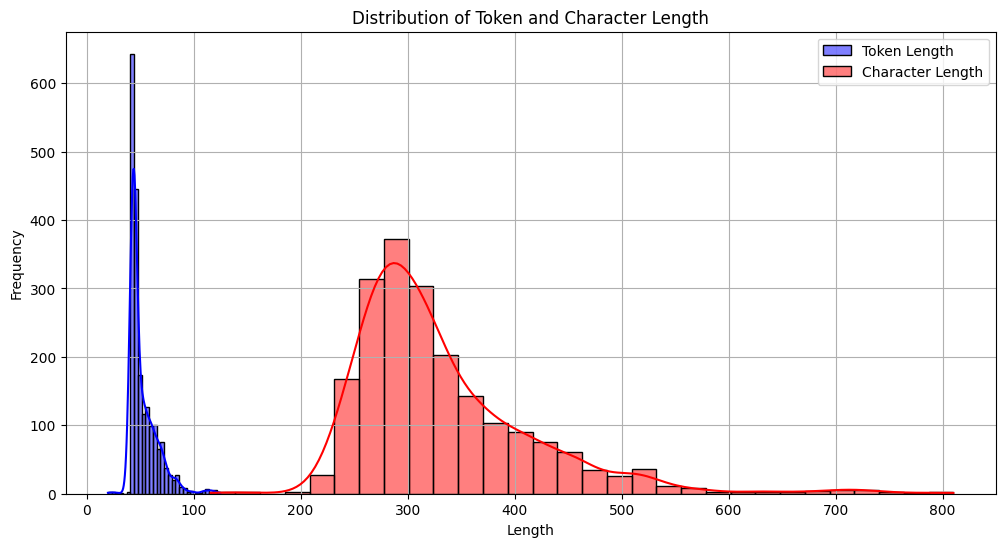

Average token length: 52.3 tokens
Average character length: 332.5 characters
Minimum token length: 20 tokens
Minimum character length: 116 characters
Maximum token length: 125 tokens
Maximum character length: 810 characters


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_token_character_distribution(df, column):
    # Calculate token and character lengths
    df['token_length'] = df[column].apply(lambda x: len(x.split()))
    df['char_length'] = df[column].apply(lambda x: len(x))
    
    # Calculate statistical information
    avg_token_length = df['token_length'].mean()
    avg_char_length = df['char_length'].mean()
    min_token_length = df['token_length'].min()
    min_char_length = df['char_length'].min()
    max_token_length = df['token_length'].max()
    max_char_length = df['char_length'].max()
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    sns.histplot(df['token_length'], color='blue', label='Token Length', kde=True, bins=30)
    sns.histplot(df['char_length'], color='red', label='Character Length', kde=True, bins=30)
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.title('Distribution of Token and Character Length')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Output statistical information
    info = (
        f"Average token length: {avg_token_length:.1f} tokens\n"
        f"Average character length: {avg_char_length:.1f} characters\n"
        f"Minimum token length: {min_token_length} tokens\n"
        f"Minimum character length: {min_char_length} characters\n"
        f"Maximum token length: {max_token_length} tokens\n"
        f"Maximum character length: {max_char_length} characters"
    )
    
    return info

# Example usage
# df = pd.DataFrame({'text': ["Sample text data for testing the function"]})  # Replace with your actual dataframe and column
info = plot_token_character_distribution(df, 'extracted_text')
print(info)


## TF IDF Word Cloud 

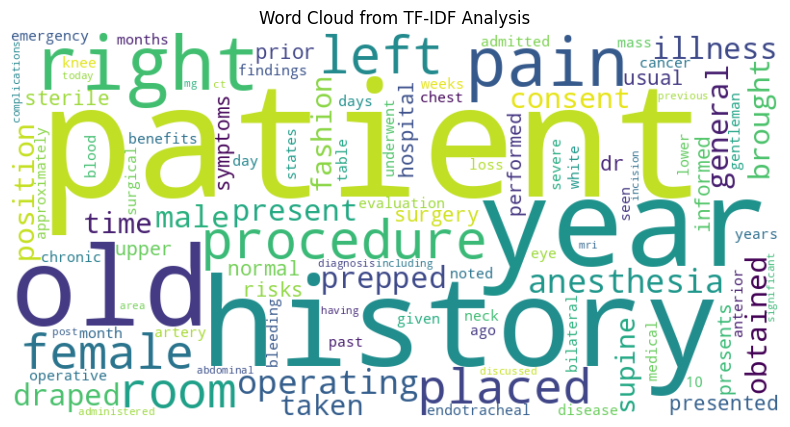

          Token  TF-IDF Score
4372    patient    107.271781
2840    history     59.410534
6620       year     58.475417
4146        old     58.433711
5175      right     53.936257
4280       pain     43.053683
4732  procedure     42.231266
3415       left     40.895130
5199       room     37.019998
4523     placed     35.078260


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def tfidf_analysis_and_wordcloud(df, column, max_words=100, top_n=10):
    """
    Generates a word cloud based on TF-IDF analysis of the specified column in the DataFrame.
    Also outputs the top N tokens with the highest TF-IDF scores.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column (str): The name of the column containing text data.
    max_words (int): The maximum number of words to display in the word cloud.
    top_n (int): The number of top tokens to display based on TF-IDF scores.
    
    Returns:
    pd.DataFrame: DataFrame containing the top N tokens and their TF-IDF scores.
    """
    # Initialize the TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(stop_words='english')
    
    # Fit and transform the text data
    tfidf_matrix = vectorizer.fit_transform(df[column])
    
    # Get the feature names (words)
    feature_names = vectorizer.get_feature_names_out()
    
    # Sum the TF-IDF scores for each word
    tfidf_scores = tfidf_matrix.sum(axis=0).A1
    
    # Create a dictionary of words and their corresponding TF-IDF scores
    tfidf_dict = dict(zip(feature_names, tfidf_scores))
    
    # Convert the dictionary to a DataFrame for easier analysis
    tfidf_df = pd.DataFrame(list(tfidf_dict.items()), columns=['Token', 'TF-IDF Score'])
    
    # Sort the DataFrame by TF-IDF Score in descending order
    tfidf_df = tfidf_df.sort_values(by='TF-IDF Score', ascending=False)
    
    # Get the top N tokens
    top_tokens = tfidf_df.head(top_n)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, max_words=max_words, background_color='white').generate_from_frequencies(tfidf_dict)
    
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud from TF-IDF Analysis')
    plt.show()
    
    # Output the top N tokens with the highest TF-IDF scores
    return top_tokens

# Call the function with the DataFrame and the column name
top_tokens = tfidf_analysis_and_wordcloud(df, 'extracted_text')

# Display the top tokens
print(top_tokens)
